In [1]:
import pandas as pd

In [2]:
data_set = pd.read_csv("F:\Data Analyst Roadmap\Inrenship\Intermediate Colleges of Pakistan EDA\All the Intermediate Colleges in Pakistan.csv")

In [3]:
data_set.head()

,Name,Location,Study Program,Sector,Affiliation,Rating
0,Campus.pk Lahore,"Office 206, 2nd Floor Siddique Trade Center Ma...",FSc Pre Engineering Fsc Pre Medical,Private,ads,0*
1,Allama Iqbal Open University Aiou Islamabad,"Sector H-8, Islamabad-44000",FSc Pre Engineering ICs Computer Science FSc P...,Public,NaN,5*
2,Government College University Gcu Lahore,"GC University, Katchery Road Lahore 54000",FSc Pre Engineering ICS Computer Science FSc P...,Public,HEC,4*
3,Govt College University GCU Faisalabad,"Kotwali Rd, Faisalabad 38000",FSc Pre-Engineering ICS FSc Pre-Medical Icom F...,Public,HEC,3*
4,Lahore College For Women University (Lcwu) Lahore,"Near Wapda Flats, Jail Road, Lahore",FA Arts FSc Pre Engineering ICS Physics ICS St...,Public,NaN,5*


# Check for the missing values

In [4]:
missing_values = data_set.isnull().sum()
print(missing_values)

Name                0
Location            4
Study Program       0
Sector            529
Affiliation      1475
Rating              0
dtype: int64


# Drop colum if missing value is 50% OR greater than 50%

Affiliation have 90% missing values so will have to drop this colum.

In [5]:
data_set.drop(columns=['Affiliation'], inplace=True)

In [6]:
data_set.head()

,Name,Location,Study Program,Sector,Rating
0,Campus.pk Lahore,"Office 206, 2nd Floor Siddique Trade Center Ma...",FSc Pre Engineering Fsc Pre Medical,Private,0*
1,Allama Iqbal Open University Aiou Islamabad,"Sector H-8, Islamabad-44000",FSc Pre Engineering ICs Computer Science FSc P...,Public,5*
2,Government College University Gcu Lahore,"GC University, Katchery Road Lahore 54000",FSc Pre Engineering ICS Computer Science FSc P...,Public,4*
3,Govt College University GCU Faisalabad,"Kotwali Rd, Faisalabad 38000",FSc Pre-Engineering ICS FSc Pre-Medical Icom F...,Public,3*
4,Lahore College For Women University (Lcwu) Lahore,"Near Wapda Flats, Jail Road, Lahore",FA Arts FSc Pre Engineering ICS Physics ICS St...,Public,5*


In [7]:
#use mode() to add missing values in location colum
data_set['Location'].fillna(data_set['Location'].mode()[0], inplace=True) 

In [8]:
#use mode() to add missing values in Sector column as well.
data_set['Sector'].fillna(data_set['Sector'].mode()[0], inplace=True)

In [9]:
print(data_set.isnull().sum())

Name             0
Location         0
Study Program    0
Sector           0
Rating           0
dtype: int64


# Correct Inconsistencies (if required)

In [10]:
print(data_set['Location'].unique())

['Office 206, 2nd Floor Siddique Trade Center Main Boulevard Gulberg III Lahore '
 'Sector H-8, Islamabad-44000' 'GC University, Katchery Road Lahore 54000'
 ... 'Riphah International College Swat'
 'Riphah International College Dina' 'Riphah International College Dargai']


extract city from location column

In [11]:
import re

def extract_city(location):

    cities = {
        'Lahore': r'Lahore',
        'Islamabad': r'Islamabad',
        'Karachi': r'Karachi',
        'Swat': r'Swat',
        'Dina': r'Dina',
        'Dargai': r'Dargai',
      
    }

    for city, pattern in cities.items():
        if re.search(pattern, location, re.IGNORECASE):
            return city
    return 'Unknown' #for just default/Unknown values


data_set['City'] = data_set['Location'].apply(extract_city)

In [12]:
print(data_set['City'].unique())

['Lahore' 'Islamabad' 'Unknown' 'Karachi' 'Dina' 'Swat' 'Dargai']


In [13]:
data_set.head()

,Name,Location,Study Program,Sector,Rating,City
0,Campus.pk Lahore,"Office 206, 2nd Floor Siddique Trade Center Ma...",FSc Pre Engineering Fsc Pre Medical,Private,0*,Lahore
1,Allama Iqbal Open University Aiou Islamabad,"Sector H-8, Islamabad-44000",FSc Pre Engineering ICs Computer Science FSc P...,Public,5*,Islamabad
2,Government College University Gcu Lahore,"GC University, Katchery Road Lahore 54000",FSc Pre Engineering ICS Computer Science FSc P...,Public,4*,Lahore
3,Govt College University GCU Faisalabad,"Kotwali Rd, Faisalabad 38000",FSc Pre-Engineering ICS FSc Pre-Medical Icom F...,Public,3*,Unknown
4,Lahore College For Women University (Lcwu) Lahore,"Near Wapda Flats, Jail Road, Lahore",FA Arts FSc Pre Engineering ICS Physics ICS St...,Public,5*,Lahore


In [14]:
print(data_set['Rating'].describe())

count     1630
unique      21
top         0*
freq      1119
Name: Rating, dtype: object


Remove non-numeric characters like '*' and convert to numeric (Rating Column)

In [15]:
data_set['Rating'] = data_set['Rating'].str.replace('*', '', regex=False).astype(float)

In [16]:
data_set['Rating'] = pd.to_numeric(data_set['Rating'], errors='coerce')

In [17]:
print(data_set['Rating'].describe())

count    1630.000000
mean        1.118865
std         1.825516
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         5.000000
Name: Rating, dtype: float64


In [18]:
data_set.head()

,Name,Location,Study Program,Sector,Rating,City
0,Campus.pk Lahore,"Office 206, 2nd Floor Siddique Trade Center Ma...",FSc Pre Engineering Fsc Pre Medical,Private,0.0,Lahore
1,Allama Iqbal Open University Aiou Islamabad,"Sector H-8, Islamabad-44000",FSc Pre Engineering ICs Computer Science FSc P...,Public,5.0,Islamabad
2,Government College University Gcu Lahore,"GC University, Katchery Road Lahore 54000",FSc Pre Engineering ICS Computer Science FSc P...,Public,4.0,Lahore
3,Govt College University GCU Faisalabad,"Kotwali Rd, Faisalabad 38000",FSc Pre-Engineering ICS FSc Pre-Medical Icom F...,Public,3.0,Unknown
4,Lahore College For Women University (Lcwu) Lahore,"Near Wapda Flats, Jail Road, Lahore",FA Arts FSc Pre Engineering ICS Physics ICS St...,Public,5.0,Lahore


# In-depth Exploratory Data Analysis (EDA)

# Analyze Ratings Across Regions For Academic Results Analysis

In [19]:
city_performance = data_set.groupby('City')['Rating'].mean().sort_values(ascending=False)
print(city_performance)

City
Swat         2.350000
Lahore       1.536036
Karachi      1.219907
Unknown      1.065039
Islamabad    0.811475
Dina         0.545455
Dargai       0.400000
Name: Rating, dtype: float64


In [20]:
import matplotlib.pyplot as plt

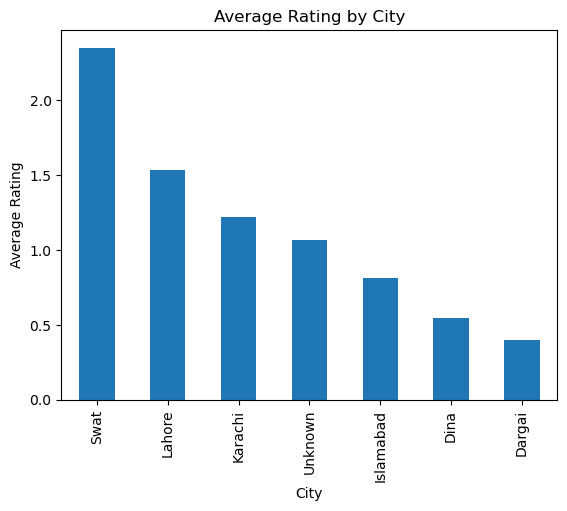

In [21]:
city_performance.plot(kind='bar', title='Average Rating by City')
plt.ylabel('Average Rating')
plt.show()

# Faculty Quality Analysis

In [22]:
Faculty_sector_performance = data_set.groupby('Sector')['Rating'].mean().sort_values(ascending=False)
print(Faculty_sector_performance)

Sector
Private    1.186755
Public     0.981447
Name: Rating, dtype: float64


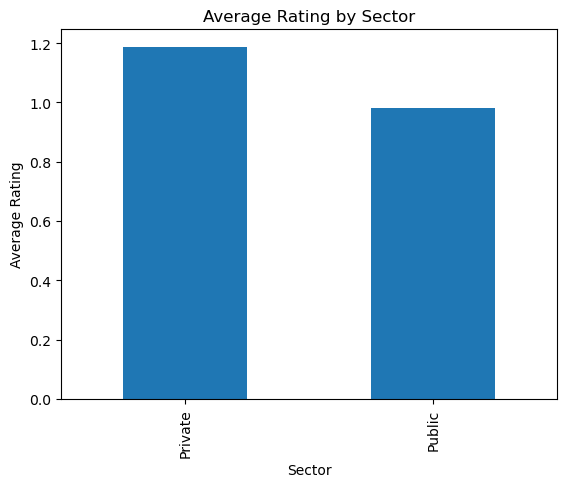

In [23]:
Faculty_sector_performance.plot(kind='bar', title='Average Rating by Sector')
plt.ylabel('Average Rating')
plt.show()

In [24]:
data_set.head()

,Name,Location,Study Program,Sector,Rating,City
0,Campus.pk Lahore,"Office 206, 2nd Floor Siddique Trade Center Ma...",FSc Pre Engineering Fsc Pre Medical,Private,0.0,Lahore
1,Allama Iqbal Open University Aiou Islamabad,"Sector H-8, Islamabad-44000",FSc Pre Engineering ICs Computer Science FSc P...,Public,5.0,Islamabad
2,Government College University Gcu Lahore,"GC University, Katchery Road Lahore 54000",FSc Pre Engineering ICS Computer Science FSc P...,Public,4.0,Lahore
3,Govt College University GCU Faisalabad,"Kotwali Rd, Faisalabad 38000",FSc Pre-Engineering ICS FSc Pre-Medical Icom F...,Public,3.0,Unknown
4,Lahore College For Women University (Lcwu) Lahore,"Near Wapda Flats, Jail Road, Lahore",FA Arts FSc Pre Engineering ICS Physics ICS St...,Public,5.0,Lahore


# Regional Disparity Analysis

Text(0, 0.5, 'Average Rating')

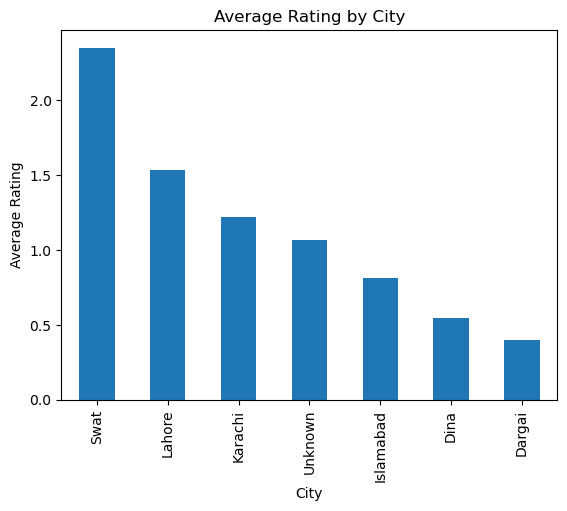

In [28]:
#Compare average ratings by city

city_comparison = data_set.groupby('City')['Rating'].mean().sort_values(ascending=False)
city_comparison.plot(kind='bar', title='Average Rating by City')
plt.ylabel('Average Rating')


In [29]:
#analyze sector distribution in Low-Performing regions:

low_performance_regions = data_set[data_set['City'].isin(['Dargai', 'Dina'])]

In [30]:
sector_distribution = low_performance_regions.groupby('City')['Sector'].value_counts(normalize=True).unstack()
print(sector_distribution)

Sector   Private    Public
City                      
Dargai  0.600000  0.400000
Dina    0.636364  0.363636


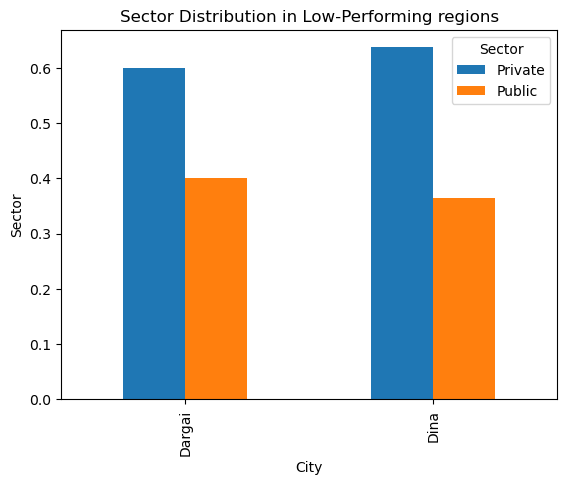

In [31]:
sector_distribution.plot(kind='bar', title='Sector Distribution in Low-Performing regions')
plt.ylabel('Sector')
plt.show()